# Immoeliza project

## 1. Data cleaning

### Import of the necessary library

In [100]:
import pandas as pd
import numpy as np
import seaborn as sns
import geopandas
import matplotlib.pyplot as plt
%matplotlib inline

pd.options.display.max_colwidth=150
pd.options.display.max_columns=35
pd.options.display.max_rows = 150

### Load of the dataset immo

In [71]:
data = pd.read_json('final_dataset_to_clean.json')

In [72]:
data.head()

,Url,BathroomCount,BedroomCount,ConstructionYear,Country,District,Fireplace,FloodingZone,Furnished,Garden,GardenArea,Kitchen,LivingArea,Locality,MonthlyCharges,NumberOfFacades,PEB,PostalCode,Price,PropertyId,Province,Region,RoomCount,ShowerCount,StateOfBuilding,SubtypeOfProperty,SurfaceOfPlot,SwimmingPool,Terrace,ToiletCount,TypeOfProperty,TypeOfSale
2,https://www.immoweb.be/en/classified/apartment/for-sale/zeebrugge/8380/10957010,1.0,1,1969.0,Belgium,Brugge,NaN,None,NaN,NaN,NaN,None,29.0,Zeebrugge,NaN,NaN,None,8380,99000,10957010,West Flanders,Flanders,1.0,0.0,GOOD,flat_studio,NaN,NaN,1.0,1.0,2,residential_sale
6,https://www.immoweb.be/en/classified/house/for-sale/tournai/7500/10956841,6.0,13,1920.0,Belgium,Tournai,NaN,None,0.0,NaN,NaN,None,391.0,Tournai,NaN,3.0,D,7500,765000,10956841,Hainaut,Wallonie,31.0,NaN,GOOD,apartment_block,130.0,NaN,NaN,5.0,1,residential_sale
8,https://www.immoweb.be/en/classified/house/for-sale/blankenberge/8370/10956807,2.0,4,2008.0,Belgium,Brugge,NaN,NON_FLOOD_ZONE,1.0,NaN,NaN,INSTALLED,111.0,BLANKENBERGE,NaN,2.0,B,8370,399000,10956807,West Flanders,Flanders,NaN,0.0,GOOD,house,0.0,NaN,NaN,2.0,1,residential_sale
10,https://www.immoweb.be/en/classified/house/for-sale/de-panne/8660/10956664,1.0,4,NaN,Belgium,Veurne,NaN,None,NaN,1.0,1.0,None,NaN,De Panne,NaN,2.0,F,8660,230000,10956664,West Flanders,Flanders,NaN,NaN,TO_BE_DONE_UP,house,170.0,0.0,1.0,2.0,1,residential_sale
11,https://www.immoweb.be/en/classified/apartment/for-sale/hasselt/3500/10956668,0.0,2,1972.0,Belgium,Hasselt,NaN,NON_FLOOD_ZONE,NaN,NaN,NaN,None,92.0,Hasselt,NaN,NaN,B,3500,198000,10956668,Limburg,Flanders,1.0,0.0,AS_NEW,apartment,NaN,NaN,1.0,1.0,2,residential_sale


In [73]:
data.loc[181788]

Url                  https://www.immoweb.be/en/classified/house/for-sale/aalter/9880/11425357
BathroomCount                                                                             1.0
BedroomCount                                                                                3
ConstructionYear                                                                       2024.0
Country                                                                               Belgium
District                                                                                 Gent
Fireplace                                                                                 NaN
FloodingZone                                                                             None
Furnished                                                                                 NaN
Garden                                                                                    1.0
GardenArea                                                  

In [74]:
data.isnull().sum()

Url                       0
BathroomCount          9602
BedroomCount              0
ConstructionYear      49816
Country                   0
District                  7
Fireplace            114591
FloodingZone          60372
Furnished             88389
Garden                96211
GardenArea            96211
Kitchen               51580
LivingArea            14175
Locality                  2
MonthlyCharges       105064
NumberOfFacades       41772
PEB                   33640
PostalCode                0
Price                     0
PropertyId                0
Province                  7
Region                    7
RoomCount             85798
ShowerCount           61587
StateOfBuilding       37092
SubtypeOfProperty         0
SurfaceOfPlot         60477
SwimmingPool          78356
Terrace               50370
ToiletCount           22273
TypeOfProperty            0
TypeOfSale                0
dtype: int64

In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118714 entries, 2 to 181792
Data columns (total 32 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Url                118714 non-null  object 
 1   BathroomCount      109112 non-null  float64
 2   BedroomCount       118714 non-null  int64  
 3   ConstructionYear   68898 non-null   float64
 4   Country            118714 non-null  object 
 5   District           118707 non-null  object 
 6   Fireplace          4123 non-null    float64
 7   FloodingZone       58342 non-null   object 
 8   Furnished          30325 non-null   float64
 9   Garden             22503 non-null   float64
 10  GardenArea         22503 non-null   float64
 11  Kitchen            67134 non-null   object 
 12  LivingArea         104539 non-null  float64
 13  Locality           118712 non-null  object 
 14  MonthlyCharges     13650 non-null   float64
 15  NumberOfFacades    76942 non-null   float64
 16  PEB    

In [76]:
data.describe()

,BathroomCount,BedroomCount,ConstructionYear,Fireplace,Furnished,Garden,GardenArea,LivingArea,MonthlyCharges,NumberOfFacades,PostalCode,Price,PropertyId,RoomCount,ShowerCount,SurfaceOfPlot,SwimmingPool,Terrace,ToiletCount,TypeOfProperty
count,109112.000000,118714.000000,68898.000000,4123.0,30325.000000,22503.0,2.250300e+04,104539.000000,13650.000000,76942.000000,118714.000000,1.187140e+05,1.187140e+05,32916.000000,57127.000000,5.823700e+04,40358.000000,68344.0,9.644100e+04,118714.000000
mean,1.232898,2.708383,1987.345496,1.0,0.070041,1.0,4.509960e+04,167.396417,84.239853,2.791557,5166.113129,3.815797e+05,1.245875e+07,6.806538,0.696186,3.118253e+03,0.050994,1.0,4.120696e+01,1.509460
std,1.092045,1.855343,47.311922,0.0,0.255221,0.0,6.666220e+06,1814.592952,179.608171,0.872792,3060.657713,4.754330e+05,3.131297e+06,5.458941,6.563612,4.776406e+05,0.219987,0.0,1.234059e+04,0.499913
min,0.000000,0.000000,1753.000000,1.0,0.000000,1.0,1.000000e+00,9.000000,0.000000,1.000000,0.000000,1.000000e+00,1.882546e+06,1.000000,0.000000,0.000000e+00,0.000000,1.0,0.000000e+00,1.000000
25%,1.000000,2.000000,1964.000000,1.0,0.000000,1.0,4.800000e+01,90.000000,0.000000,2.000000,2250.000000,2.000000e+05,1.114592e+07,2.000000,0.000000,1.480000e+02,0.000000,1.0,1.000000e+00,1.000000
50%,1.000000,3.000000,2000.000000,1.0,0.000000,1.0,1.400000e+02,124.000000,30.000000,3.000000,4671.000000,3.095000e+05,1.138077e+07,6.000000,0.000000,3.530000e+02,0.000000,1.0,1.000000e+00,2.000000
75%,1.000000,3.000000,2023.000000,1.0,0.000000,1.0,4.500000e+02,182.000000,120.000000,4.000000,8400.000000,4.390000e+05,1.146776e+07,10.000000,1.000000,8.000000e+02,0.000000,1.0,2.000000e+00,2.000000
max,145.000000,200.000000,8071.000000,1.0,1.000000,1.0,1.000000e+09,452230.000000,5250.000000,24.000000,9992.000000,3.500000e+07,2.002586e+07,68.000000,1120.000000,1.152500e+08,1.000000,1.0,3.832365e+06,2.000000


In [77]:
data["MonthlyCharges"].head()

2    NaN
6    NaN
8    NaN
10   NaN
11   NaN
Name: MonthlyCharges, dtype: float64

In [78]:
data.head(25)

,Url,BathroomCount,BedroomCount,ConstructionYear,Country,District,Fireplace,FloodingZone,Furnished,Garden,GardenArea,Kitchen,LivingArea,Locality,MonthlyCharges,NumberOfFacades,PEB,PostalCode,Price,PropertyId,Province,Region,RoomCount,ShowerCount,StateOfBuilding,SubtypeOfProperty,SurfaceOfPlot,SwimmingPool,Terrace,ToiletCount,TypeOfProperty,TypeOfSale
2,https://www.immoweb.be/en/classified/apartment/for-sale/zeebrugge/8380/10957010,1.0,1,1969.0,Belgium,Brugge,NaN,None,NaN,NaN,NaN,None,29.0,Zeebrugge,NaN,NaN,None,8380,99000,10957010,West Flanders,Flanders,1.0,0.0,GOOD,flat_studio,NaN,NaN,1.0,1.0,2,residential_sale
6,https://www.immoweb.be/en/classified/house/for-sale/tournai/7500/10956841,6.0,13,1920.0,Belgium,Tournai,NaN,None,0.0,NaN,NaN,None,391.0,Tournai,NaN,3.0,D,7500,765000,10956841,Hainaut,Wallonie,31.0,NaN,GOOD,apartment_block,130.0,NaN,NaN,5.0,1,residential_sale
8,https://www.immoweb.be/en/classified/house/for-sale/blankenberge/8370/10956807,2.0,4,2008.0,Belgium,Brugge,NaN,NON_FLOOD_ZONE,1.0,NaN,NaN,INSTALLED,111.0,BLANKENBERGE,NaN,2.0,B,8370,399000,10956807,West Flanders,Flanders,NaN,0.0,GOOD,house,0.0,NaN,NaN,2.0,1,residential_sale
10,https://www.immoweb.be/en/classified/house/for-sale/de-panne/8660/10956664,1.0,4,NaN,Belgium,Veurne,NaN,None,NaN,1.0,1.0,None,NaN,De Panne,NaN,2.0,F,8660,230000,10956664,West Flanders,Flanders,NaN,NaN,TO_BE_DONE_UP,house,170.0,0.0,1.0,2.0,1,residential_sale
11,https://www.immoweb.be/en/classified/apartment/for-sale/hasselt/3500/10956668,0.0,2,1972.0,Belgium,Hasselt,NaN,NON_FLOOD_ZONE,NaN,NaN,NaN,None,92.0,Hasselt,NaN,NaN,B,3500,198000,10956668,Limburg,Flanders,1.0,0.0,AS_NEW,apartment,NaN,NaN,1.0,1.0,2,residential_sale
14,https://www.immoweb.be/en/classified/apartment/for-sale/schaerbeek/1030/10956614,1.0,1,1994.0,Belgium,Brussels,NaN,None,1.0,NaN,NaN,HYPER_EQUIPPED,50.0,Schaerbeek,NaN,2.0,E,1030,215000,10956614,Brussels,Brussels,NaN,NaN,AS_NEW,apartment,NaN,0.0,1.0,1.0,2,residential_sale
15,https://www.immoweb.be/en/classified/house/for-rent/waterloo/1410/10956598,4.0,6,1970.0,Belgium,Nivelles,1.0,NON_FLOOD_ZONE,NaN,1.0,2519.0,INSTALLED,425.0,WATERLOO,0.0,4.0,C,1410,5500,10956598,Walloon Brabant,Wallonie,NaN,0.0,GOOD,villa,2519.0,NaN,1.0,5.0,1,residential_monthly_rent
18,https://www.immoweb.be/en/classified/house/for-sale/putte/2580/10956546,0.0,2,NaN,Belgium,Mechelen,NaN,NON_FLOOD_ZONE,NaN,NaN,NaN,None,NaN,Putte,NaN,3.0,F,2580,235000,10956546,Antwerp,Flanders,1.0,0.0,None,house,423.0,NaN,NaN,0.0,1,residential_sale
22,https://www.immoweb.be/en/classified/apartment/for-sale/vilvoorde/1800/10956452,2.0,3,2023.0,Belgium,Halle-Vilvoorde,NaN,None,NaN,NaN,NaN,None,NaN,Vilvoorde,NaN,3.0,A,1800,485000,10956452,Flemish Brabant,Flanders,NaN,0.0,None,apartment,NaN,0.0,NaN,NaN,2,residential_sale
23,https://www.immoweb.be/en/classified/apartment/for-sale/temse/9140/10956305,NaN,2,NaN,Belgium,Sint-Niklaas,NaN,None,NaN,NaN,NaN,None,101.0,Temse,NaN,NaN,None,9140,320000,10956305,East Flanders,Flanders,NaN,0.0,None,apartment,NaN,NaN,NaN,NaN,2,residential_sale


In [79]:
data.update(data[['BathroomCount', 'Fireplace', 'Furnished', 'Garden', 'GardenArea', 'SwimmingPool', 'Terrace', 'ToiletCount']].fillna(0))
data.head()

,Url,BathroomCount,BedroomCount,ConstructionYear,Country,District,Fireplace,FloodingZone,Furnished,Garden,GardenArea,Kitchen,LivingArea,Locality,MonthlyCharges,NumberOfFacades,PEB,PostalCode,Price,PropertyId,Province,Region,RoomCount,ShowerCount,StateOfBuilding,SubtypeOfProperty,SurfaceOfPlot,SwimmingPool,Terrace,ToiletCount,TypeOfProperty,TypeOfSale
2,https://www.immoweb.be/en/classified/apartment/for-sale/zeebrugge/8380/10957010,1.0,1,1969.0,Belgium,Brugge,0.0,None,0.0,0.0,0.0,None,29.0,Zeebrugge,NaN,NaN,None,8380,99000,10957010,West Flanders,Flanders,1.0,0.0,GOOD,flat_studio,NaN,0.0,1.0,1.0,2,residential_sale
6,https://www.immoweb.be/en/classified/house/for-sale/tournai/7500/10956841,6.0,13,1920.0,Belgium,Tournai,0.0,None,0.0,0.0,0.0,None,391.0,Tournai,NaN,3.0,D,7500,765000,10956841,Hainaut,Wallonie,31.0,NaN,GOOD,apartment_block,130.0,0.0,0.0,5.0,1,residential_sale
8,https://www.immoweb.be/en/classified/house/for-sale/blankenberge/8370/10956807,2.0,4,2008.0,Belgium,Brugge,0.0,NON_FLOOD_ZONE,1.0,0.0,0.0,INSTALLED,111.0,BLANKENBERGE,NaN,2.0,B,8370,399000,10956807,West Flanders,Flanders,NaN,0.0,GOOD,house,0.0,0.0,0.0,2.0,1,residential_sale
10,https://www.immoweb.be/en/classified/house/for-sale/de-panne/8660/10956664,1.0,4,NaN,Belgium,Veurne,0.0,None,0.0,1.0,1.0,None,NaN,De Panne,NaN,2.0,F,8660,230000,10956664,West Flanders,Flanders,NaN,NaN,TO_BE_DONE_UP,house,170.0,0.0,1.0,2.0,1,residential_sale
11,https://www.immoweb.be/en/classified/apartment/for-sale/hasselt/3500/10956668,0.0,2,1972.0,Belgium,Hasselt,0.0,NON_FLOOD_ZONE,0.0,0.0,0.0,None,92.0,Hasselt,NaN,NaN,B,3500,198000,10956668,Limburg,Flanders,1.0,0.0,AS_NEW,apartment,NaN,0.0,1.0,1.0,2,residential_sale


In [80]:
data.sort_values('PostalCode', ascending=True).head(25)


,Url,BathroomCount,BedroomCount,ConstructionYear,Country,District,Fireplace,FloodingZone,Furnished,Garden,GardenArea,Kitchen,LivingArea,Locality,MonthlyCharges,NumberOfFacades,PEB,PostalCode,Price,PropertyId,Province,Region,RoomCount,ShowerCount,StateOfBuilding,SubtypeOfProperty,SurfaceOfPlot,SwimmingPool,Terrace,ToiletCount,TypeOfProperty,TypeOfSale
106153,https://www.immoweb.be/en/classified/apartment/for-rent/gent/0/11297796,1.0,1,NaN,Belgium,None,0.0,None,0.0,0.0,0.0,None,52.0,Gent,25.0,NaN,B,0,750,11297796,None,None,4.0,0.0,GOOD,apartment,NaN,0.0,0.0,1.0,2,residential_monthly_rent
43817,https://www.immoweb.be/en/classified/apartment/for-sale/brussel/1000/11456433,1.0,2,NaN,Belgium,Brussels,0.0,None,0.0,0.0,0.0,SEMI_EQUIPPED,125.0,BRUSSEL,NaN,NaN,D,1000,455000,11456433,Brussels,Brussels,NaN,0.0,GOOD,apartment,NaN,0.0,0.0,1.0,2,residential_sale
129263,https://www.immoweb.be/en/classified/apartment/for-sale/bruxelles/1000/11068762,1.0,1,2016.0,Belgium,Brussels,0.0,POSSIBLE_FLOOD_ZONE,1.0,1.0,40.0,HYPER_EQUIPPED,17.0,Bruxelles,NaN,NaN,None,1000,180000,11068762,Brussels,Brussels,NaN,1.0,AS_NEW,apartment,NaN,0.0,0.0,1.0,2,residential_sale
35518,https://www.immoweb.be/en/classified/apartment/for-rent/brussels/1000/11466784,1.0,1,1969.0,Belgium,Brussels,0.0,NON_FLOOD_ZONE,0.0,0.0,0.0,INSTALLED,40.0,Brussels,100.0,2.0,None,1000,895,11466784,Brussels,Brussels,NaN,1.0,JUST_RENOVATED,flat_studio,NaN,0.0,0.0,1.0,2,residential_monthly_rent
17052,https://www.immoweb.be/en/classified/apartment/for-sale/bruxelles/1000/20020747,1.0,1,2011.0,Belgium,Brussels,0.0,NON_FLOOD_ZONE,1.0,0.0,0.0,HYPER_EQUIPPED,65.0,Bruxelles,NaN,2.0,C,1000,310000,20020747,Brussels,Brussels,NaN,1.0,AS_NEW,apartment,NaN,0.0,1.0,1.0,2,residential_sale
61268,https://www.immoweb.be/en/classified/apartment/for-rent/brussel/1000/20010043,1.0,1,NaN,Belgium,Brussels,0.0,None,0.0,0.0,0.0,None,55.0,Brussel,100.0,NaN,F,1000,1100,20010043,Brussels,Brussels,2.0,NaN,GOOD,apartment,NaN,0.0,0.0,1.0,2,residential_monthly_rent
56350,https://www.immoweb.be/en/classified/apartment/for-rent/bruxelles/1000/11491489,1.0,1,2019.0,Belgium,Brussels,0.0,NON_FLOOD_ZONE,0.0,0.0,0.0,HYPER_EQUIPPED,65.0,Bruxelles,150.0,3.0,B,1000,880,11491489,Brussels,Brussels,NaN,NaN,AS_NEW,apartment,NaN,0.0,1.0,1.0,2,residential_monthly_rent
61273,https://www.immoweb.be/en/classified/apartment/for-rent/bruxelles/1000/20010035,1.0,2,NaN,Belgium,Brussels,0.0,None,0.0,0.0,0.0,USA_HYPER_EQUIPPED,65.0,BRUXELLES,165.0,2.0,E,1000,1350,20010035,Brussels,Brussels,2.0,0.0,GOOD,apartment,NaN,0.0,0.0,0.0,2,residential_monthly_rent
61274,https://www.immoweb.be/en/classified/apartment/for-rent/bruxelles/1000/20010036,1.0,1,NaN,Belgium,Brussels,0.0,None,0.0,0.0,0.0,USA_HYPER_EQUIPPED,91.0,BRUXELLES,110.0,2.0,G,1000,1390,20010036,Brussels,Brussels,1.0,0.0,GOOD,apartment,NaN,0.0,0.0,0.0,2,residential_monthly_rent
55113,https://www.immoweb.be/en/classified/apartment/for-rent/bruxelles/1000/20014894,1.0,1,2012.0,Belgium,Brussels,0.0,NON_FLOOD_ZONE,0.0,0.0,0.0,HYPER_EQUIPPED,58.0,Bruxelles,125.0,NaN,C,1000,895,20014894,Brussels,Brussels,NaN,1.0,TO_BE_DONE_UP,flat_studio,NaN,0.0,1.0,1.0,2,residential_monthly_rent


In [81]:
data.value_counts('PostalCode')

PostalCode
8300    2559
8400    1868
1000    1858
4000    1792
1180    1754
        ... 
5641       1
8814       1
4606       1
6223       1
0          1
Name: count, Length: 1109, dtype: int64

In [82]:
# list of zipcode
zip_code = pd.read_excel('zipcodes.xlsx')
zip_code['Code postal']

0       2970
1       3700
2       7510
3       9420
4       8511
        ... 
2760    3690
2761    8550
2762    8750
2763    9052
2764    2070
Name: Code postal, Length: 2765, dtype: int64

In [83]:
data.value_counts('TypeOfSale')

TypeOfSale
residential_sale            104948
residential_monthly_rent     13451
annuity_monthly_amount         199
annuity_without_lump_sum       109
annuity_lump_sum                 4
homes_to_build                   3
Name: count, dtype: int64

In [84]:
data.value_counts('Region')

Region
Flanders    69669
Wallonie    34940
Brussels    14098
Name: count, dtype: int64

In [126]:
sale_data = data[data.TypeOfSale == 'residential_sale']
rent_data = data[data.TypeOfSale == 'residential_monthly_rent']

In [129]:
sale_data.shape
rent_data.shape

(13451, 32)

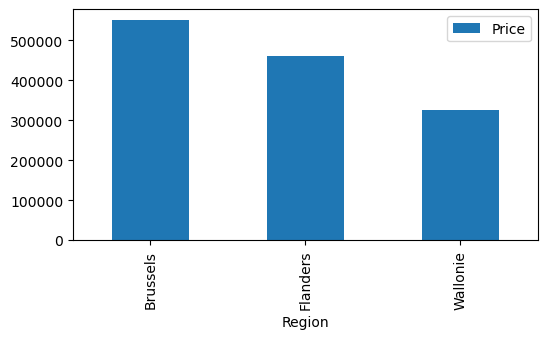

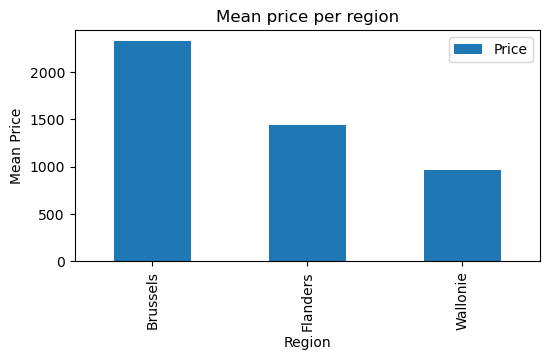

In [146]:
price_sale_region = sale_data[["Region", "Price"]].groupby("Region").mean().round()
price_rent_region = rent_data[["Region", "Price"]].groupby("Region").mean().round()

price_sale_region.plot(kind="bar", figsize=(6, 3))
price_rent_region.plot(kind="bar", figsize=(6, 3))

plt.title("Mean price per region")
plt.xlabel("Region")
plt.ylabel("Mean Price")
plt.show()


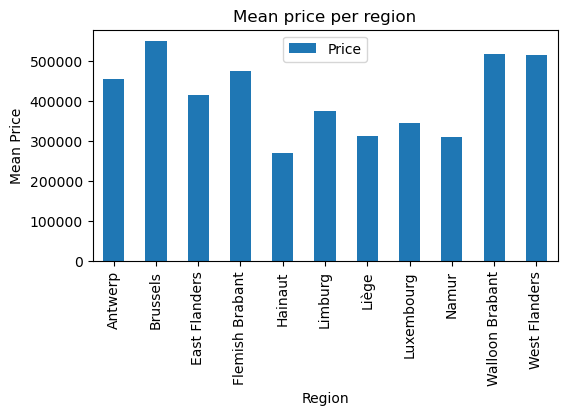

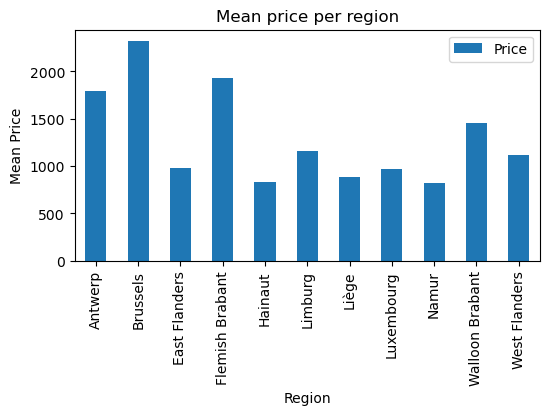

In [149]:
price_sale_province = sale_data[["Province", "Price"]].groupby("Province").mean().round()
price_rent_province = rent_data[["Province", "Price"]].groupby("Province").mean().round()

price_sale_province.plot(kind="bar", figsize=(6, 3))
plt.title("Mean price per region")
plt.xlabel("Region")
plt.ylabel("Mean Price")
plt.show()
price_rent_province.plot(kind="bar", figsize=(6, 3))

plt.title("Mean price per region")
plt.xlabel("Region")
plt.ylabel("Mean Price")
plt.show()